In [1]:
# Import packages
import sys
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show

# Display plots inline in the notebook
%matplotlib inline 


# Display all dataframe columns in outputs (it has 27 columns, which is wider than the notebook)
# This sets it up to dispaly with a horizontal scroll instead of hiding the middle columns
pd.set_option('display.max_columns', 100) 

# Load in the dataset as mh
survey_df = pd.read_csv("survey.csv")

In [2]:
survey_df.head(10)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
5,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,No,Yes,Yes,Not sure,No,Don't know,Don't know,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
6,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,Yes,Yes,No,No,No,No,No,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN
7,2014-08-27 11:32:05,39,M,Canada,NaN,NaN,No,No,Never,1-5,Yes,Yes,No,Yes,No,No,Yes,Don't know,No,No,No,No,No,No,No,No,NaN
8,2014-08-27 11:32:39,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,No,Yes,Yes,Yes,No,No,No,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN
9,2014-08-27 11:32:43,23,Male,Canada,NaN,NaN,No,No,Never,26-100,No,Yes,Don't know,No,Don't know,Don't know,Don't know,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN


In [4]:
# Explore the numeric variable Age to confirm whether all values are within a reasonable range and if any are NaN.
print("Minimum value: ", survey_df["Age"].min())
print("Maximum value: ", survey_df["Age"].max())
print("checking null values?: ", pd.isnull(survey_df['Age']).sum())

Minimum value:  -1726
Maximum value:  99999999999
checking null values?:  0


In [5]:
survey_df.dtypes

Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

In [8]:
# Convert "timestamp" data type from object to datetime
survey_df['Timestamp'] = pd.to_datetime(survey_df['Timestamp'])

# Confirm that it worked
survey_df.dtypes

Timestamp                    datetime64[ns]
Age                                   int64
Gender                               object
Country                              object
state                                object
self_employed                        object
family_history                       object
treatment                            object
work_interfere                       object
no_employees                         object
remote_work                          object
tech_company                         object
benefits                             object
care_options                         object
wellness_program                     object
seek_help                            object
anonymity                            object
leave                                object
mental_health_consequence            object
phys_health_consequence              object
coworkers                            object
supervisor                           object
mental_health_interview         

In [17]:
survey_df['Country'].replace(to_replace = ['United States'],value = 'US', inplace = True)
survey_df['Country'].replace(to_replace = ['United Kingdom'],value = 'UK', inplace = True)

In [18]:
survey_df['Country'].value_counts()

US                        751
UK                        185
Canada                     72
Germany                    45
Ireland                    27
Netherlands                27
Australia                  21
France                     13
India                      10
New Zealand                 8
Poland                      7
Switzerland                 7
Sweden                      7
Italy                       7
South Africa                6
Belgium                     6
Brazil                      6
Israel                      5
Singapore                   4
Bulgaria                    4
Austria                     3
Finland                     3
Mexico                      3
Russia                      3
Denmark                     2
Greece                      2
Colombia                    2
Croatia                     2
Portugal                    2
Moldova                     1
Georgia                     1
Bahamas, The                1
China                       1
Thailand  

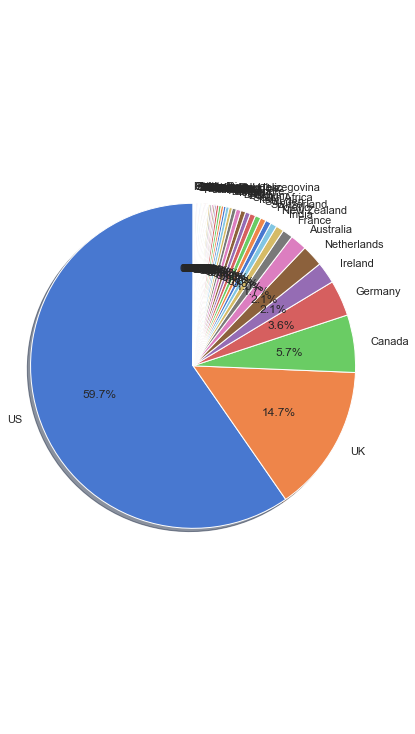

In [19]:
fig1 = plt.figure(figsize=(10,10))
ax1 = fig1.add_axes((0,0,.5,1))
labels =  survey_df['Country'].value_counts().index
sizes = survey_df['Country'].value_counts()
percentages = sizes / 1259 * 100

ax1.pie(percentages, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')

plt.savefig('distributionofsurvey.png')

plt.show()

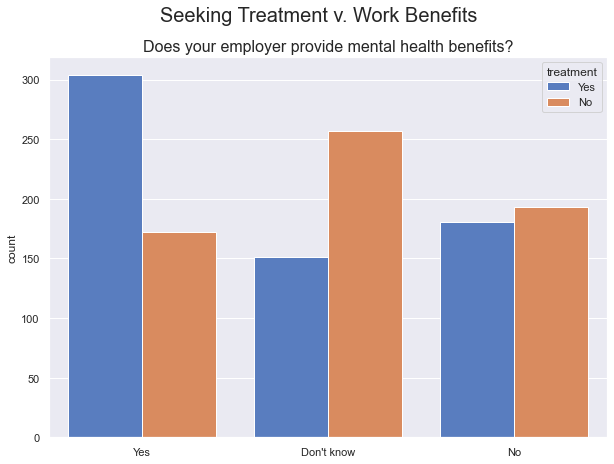

In [29]:
plt.figure(figsize=(10,7))
sns.countplot(x="benefits", hue="treatment", hue_order = ["Yes", "No"], data=survey_df)
plt.title("Does your employer provide mental health benefits?",fontsize=16)
plt.suptitle("Showing Treatment vs Work Benefits", fontsize=20)
plt.xlabel("")
plt.show()

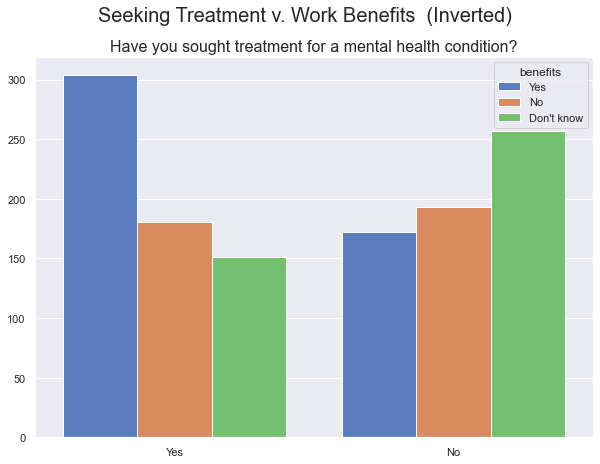

In [31]:
 # Generate a chart comparing mental health benefits and treatment
    
plt.figure(figsize=(10,7))
sns.countplot(x="treatment", hue="benefits", hue_order = ["Yes", "No", "Don't know"], data=survey_df)
plt.suptitle("Seeking Treatment v. Work Benefits  (Inverted)", fontsize=20)
plt.title("Have you sought treatment for a mental health condition?",fontsize=16)
plt.xlabel("")
plt.ylabel("")
plt.show()

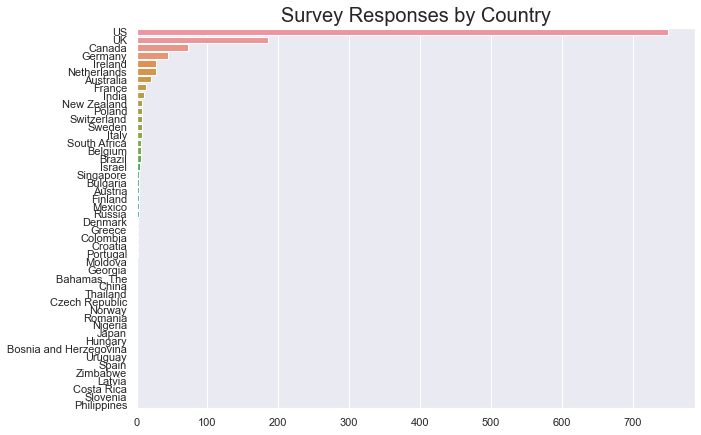

In [35]:
# Create a frequency chart for "country"

plt.figure(figsize=(10, 7))
sns.countplot(y='Country', order = survey_df['Country'].value_counts().index, data=survey_df)
plt.title('Survey Responses by Country', fontsize=20)
plt.xlabel('')
plt.ylabel('')
plt.show()

In [39]:
survey_df['self_employed'].fillna("No", inplace = True)
survey_df['self_employed'].value_counts()

No     1113
Yes     145
Name: self_employed, dtype: int64

In [43]:
# Filtering countries
countries = ['US','UK']
survey_df = survey_df[survey_df['Country'].isin(countries)]
survey_df['Country'].value_counts()

US    750
UK    185
Name: Country, dtype: int64

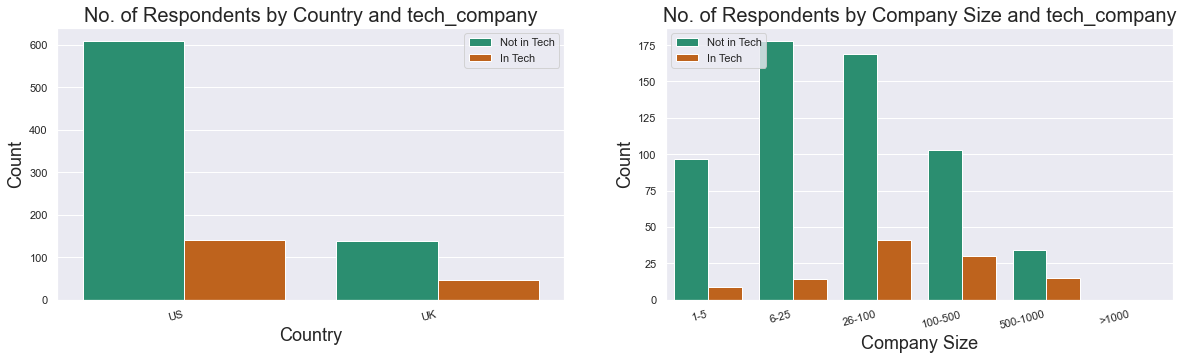

<Figure size 1152x288 with 0 Axes>

In [44]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
plt.figure(figsize = (16,4))
fig.set_figheight(5)
fig.set_figwidth(20)
plt.subplots_adjust(wspace = 0)
# plt.suptitle('Main Title')

# No of respondents by Country
sns.countplot(x = survey_df['Country'], hue = survey_df['tech_company'], ax=ax1, palette="Dark2")
ax1.set_title('No. of Respondents by Country and tech_company', fontsize = 20)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=15, ha="right")
ax1.set_xlabel('Country', fontsize = 18)
ax1.set_ylabel('Count', fontsize = 18)
ax1.legend(['Not in Tech', 'In Tech'])

# No of respondents by Company Size
sns.countplot(x = survey_df['no_employees'], hue = survey_df['tech_company'], ax=ax2, 
              order = ['1-5', '6-25', '26-100', '100-500', '500-1000', '>1000'], palette="Dark2")
ax2.set_title('No. of Respondents by Company Size and tech_company', fontsize = 20)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=15, ha="right")
ax2.set_xlabel('Company Size', fontsize = 18)
ax2.set_ylabel('Count', fontsize = 18)
ax2.legend(['Not in Tech', 'In Tech']);